In [8]:
import requests, zipfile, io

url = "https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded"

response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall()

KeyboardInterrupt: 

In [ ]:
! pwd
! ls
! rm -rf Plant_leave_diseases_dataset_with_augmentation/B*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/C*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/D*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/E*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/F*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/G*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/H*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/I*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/J*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/K*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/L*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/M*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/N*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/O*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/P*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/Q*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/R*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/S*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/T*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/U*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/V*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/W*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/X*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/Y*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/Z*
! pwd
! ls Plant_leave_diseases_dataset_with_augmentation/

/content
plant_disease_dataset.zip			sample_data
Plant_leave_diseases_dataset_with_augmentation
/content
Apple___Apple_scab  Apple___Cedar_apple_rust
Apple___Black_rot   Apple___healthy


In [ ]:
# Importing required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Path to the dataset folder
data_dir = '/content/Plant_leave_diseases_dataset_with_augmentation'

# Creating a list of all the images and labels
images = []
labels = []
disease_types = os.listdir(data_dir)

for disease_type in disease_types:
    label = disease_types.index(disease_type)
    disease_folder_path = os.path.join(data_dir, disease_type)
    for img_path in os.listdir(disease_folder_path):
        img = cv2.imread(os.path.join(disease_folder_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(label)

# Converting the lists into numpy arrays
images = np.array(images)
labels = np.array(labels)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Normalizing the pixel values of the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Converting the labels into one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=len(disease_types))
y_test = to_categorical(y_test, num_classes=len(disease_types))

In [ ]:
# Defining the CNN model
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  MaxPooling2D((2, 2)),

  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),

  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),

  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),

  Flatten(),

  Dense(512, activation='relu'),
  Dropout(0.5),

  Dense(len(disease_types), activation='softmax')
])

Epoch 1/25
117/117 [==============================] - 20s 71ms/step - loss: 0.7057 - accuracy: 0.7191 - val_loss: 0.3759 - val_accuracy: 0.8644
Epoch 2/25
117/117 [==============================] - 8s 64ms/step - loss: 0.3411 - accuracy: 0.8765 - val_loss: 0.4383 - val_accuracy: 0.8321
Epoch 3/25
117/117 [==============================] - 7s 61ms/step - loss: 0.2248 - accuracy: 0.9190 - val_loss: 0.1941 - val_accuracy: 0.9257
Epoch 4/25
117/117 [==============================] - 8s 65ms/step - loss: 0.2003 - accuracy: 0.9279 - val_loss: 0.2437 - val_accuracy: 0.9117
Epoch 5/25
117/117 [==============================] - 8s 64ms/step - loss: 0.1669 - accuracy: 0.9395 - val_loss: 0.1968 - val_accuracy: 0.9214
Epoch 6/25
117/117 [==============================] - 8s 66ms/step - loss: 0.1374 - accuracy: 0.9524 - val_loss: 0.1671 - val_accuracy: 0.9451
Epoch 7/25
117/117 [==============================] - 7s 58ms/step - loss: 0.1418 - accuracy: 0.9502 - val_loss: 0.1258 - val_accuracy: 0.953

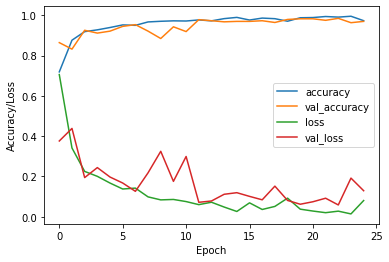

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plotting the accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()